# Symmetric Stabilizer Benchmarking (SSB)


[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Infleqtion/client-superstaq/blob/main/docs/source/apps/supermarq/qcvv/qcvv_xeb_css.ipynb)
[![Launch Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/Infleqtion/client-superstaq/HEAD?labpath=docs/source/apps/supermarq/qcvv/qcvv_xeb_css.ipynb)


To demonstrate SSB consider a noise model where single and two qubit gates are independently
affected by depolarising channels.


In [1]:
from __future__ import annotations

import cirq


class IndependentDepolariseNoiseModel(cirq.NoiseModel):
    """Applies single and two qubit depolarising channels independently"""

    def __init__(self, single_qubit_error: float, two_qubit_error: float) -> None:
        """Args:
        single_qubit_error: Single qubit pauli error
        two_qubit_error: Two qubit pauli error
        """
        super().__init__()
        self.single_qubit_error = single_qubit_error
        self.two_qubit_error = two_qubit_error

        self.single_qubit_depolarise = cirq.DepolarizingChannel(p=single_qubit_error, n_qubits=1)
        self.two_qubit_depolarise = cirq.DepolarizingChannel(p=two_qubit_error, n_qubits=2)

    def noisy_operation(self, operation: cirq.Operation) -> list[cirq.OP_TREE]:
        """Produces a list of operations by applying each noise model
        to the provided operation depending on the number of qubits it acts on.
        """
        if len(operation.qubits) == 1:
            return [operation, self.single_qubit_depolarise(*operation.qubits)]

        if len(operation.qubits) == 2:
            return [operation, self.two_qubit_depolarise(*operation.qubits)]

        return [operation]


e_1 = 0.001
e_2 = 0.025

noise = IndependentDepolariseNoiseModel(single_qubit_error=e_1, two_qubit_error=e_2)
simulator = cirq.DensityMatrixSimulator(noise=noise, seed=0)

Now run the experiment and analyse the results.

Building circuits:   0%|          | 0/500 [00:00<?, ?it/s]

Simulating circuits:   0%|          | 0/500 [00:00<?, ?it/s]

Estimated CZ fidelity: 0.97295 +/- 1.354e-06


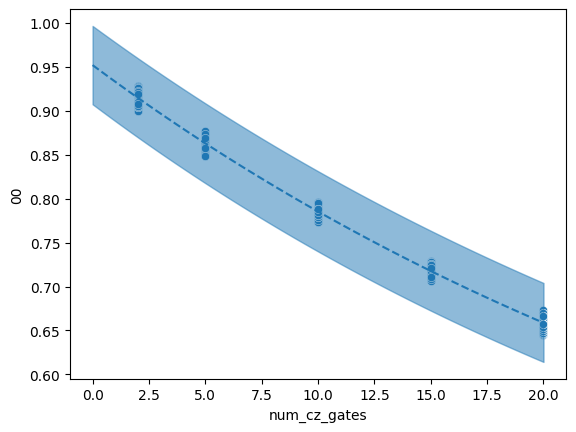

In [2]:
import supermarq.qcvv

experiment = supermarq.qcvv.SSB(seed=0, num_circuits=100, cycle_depths=[2, 5, 10, 15, 20])
results = experiment.run_with_simulator(simulator)
results.analyze(plot_results=True)

In [3]:
print(f"Expected CZ gate fidelity: {1 - 16/15 * e_2:.5f}")
results.print_results()

Expected CZ gate fidelity: 0.97333
Estimated CZ fidelity: 0.97295 +/- 1.354e-06
